In [153]:
import numpy as np
import math
from scipy import ndimage, signal
from skimage import io, morphology, filters, segmentation, measure, color
from matplotlib import pyplot as plt, patches
%matplotlib inline

# Test Instance

In [2]:
imageFilename = "./test-images/rut_1.png"

In [3]:
image=io.imread(imageFilename)

## Original Image

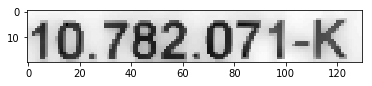

In [4]:
plt.imshow(image,cmap='gray')
plt.show()

## Apply Threshold

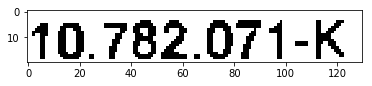

In [5]:
th=filters.threshold_otsu(image*0.95)
im_bin = image > th
plt.imshow(im_bin, cmap='gray')
plt.show()

## Get image labels and regions

In [6]:
mlabels, nlabels = morphology.label(1-im_bin, connectivity=1, return_num=True)
regions = measure.regionprops(mlabels)

## Draw rectangles around regions

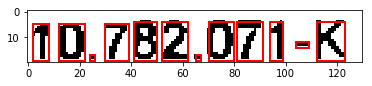

In [7]:
fig, ax = plt.subplots()
ax.imshow(im_bin,cmap='gray')

for i in range(nlabels):
    x, y, w, h = regions[i].bbox
    rect = patches.Rectangle((y, x), h - y, w - x,
                             fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
plt.show()

## Calculate region Area

In [21]:
def getSliceTupleArea(sliceTuple):
    return (sliceTuple[0].stop - sliceTuple[0].start) * (sliceTuple[1].stop - sliceTuple[1].start)

## Inspect region areas

In [34]:
roiList = []
for i in range(1, nlabels + 1):
    px, py = ndimage.find_objects(mlabels==i)[0]
    roiList.append((px,py))
    
sortedRoi = sorted(roiList, key= lambda x: x[1])

for i in range(len(sortedRoi)):
    print("region", i, "=", getSliceTupleArea(sortedRoi[i]))


region 0 = 84
region 1 = 140
region 2 = 4
region 3 = 126
region 4 = 135
region 5 = 150
region 6 = 4
region 7 = 150
region 8 = 150
region 9 = 75
region 10 = 10
region 11 = 165


## Ploting individually

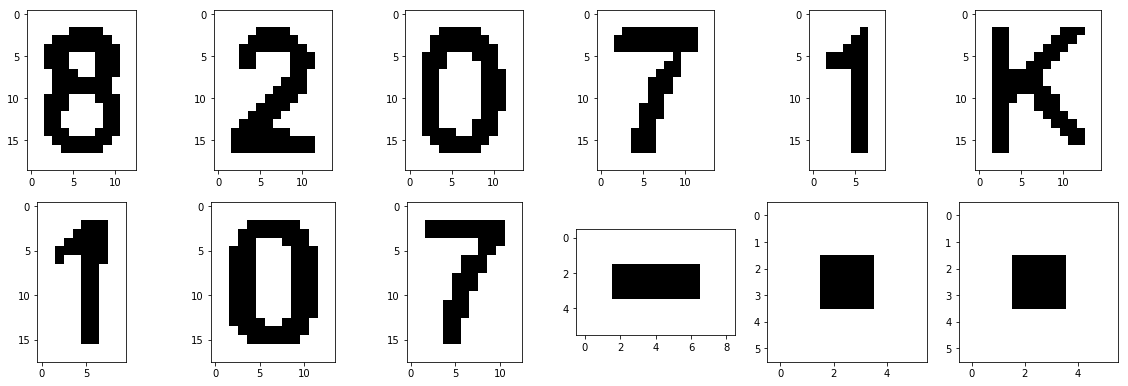

In [11]:
plt.figure(figsize=(20,10))
columns = 6
for i in range(1, nlabels + 1):
    px, py = ndimage.find_objects(mlabels==i)[0]
    roi = im_bin[px, py]
    roi = np.pad(roi, 2, mode='constant', constant_values=1)
    plt.subplot(nlabels / columns + 1, columns, i)
    plt.imshow(roi, cmap="gray")

## Sorting

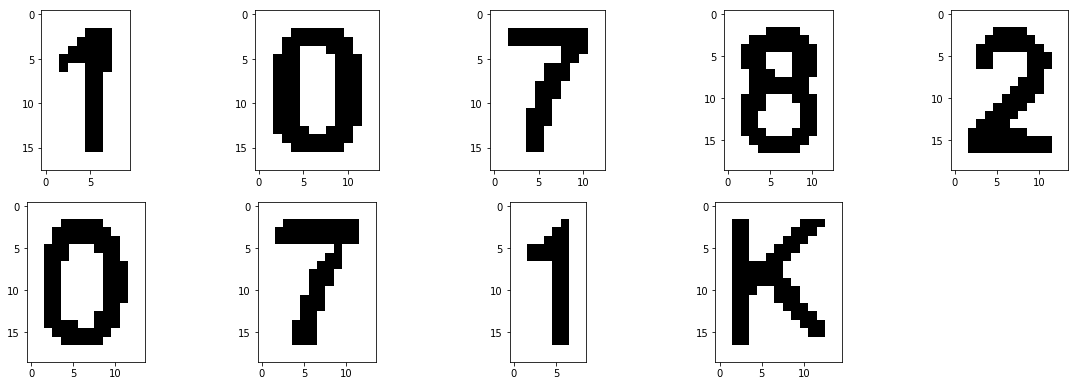

In [31]:
plt.figure(figsize=(20,10))
columns = 5
i = 0
for j in range(nlabels):
    (px, py) = sortedRoi[j]
    if(getSliceTupleArea((px,py))>10):
        roi = im_bin[px, py]
        roi = np.pad(roi, 2, mode='constant', constant_values=1)
        plt.subplot(nlabels / columns + 1, columns, i+1)
        plt.imshow(roi, cmap="gray")
        i = i + 1

## From Image to regions

In [86]:
def getImageDigits(imageFilename):
    digits = []
    #Read
    image=io.imread(imageFilename)
    
    #Threshold
    th=filters.threshold_otsu(image*0.95)
    im_bin = image > th
    
    #Regions:
    mlabels, nlabels = morphology.label(1-im_bin, connectivity=1, return_num=True)
    regions = measure.regionprops(mlabels)
    
    #Regions of Interest
    roiList = []
    for i in range(1, nlabels + 1):
        px, py = ndimage.find_objects(mlabels==i)[0]
        roiList.append((px,py))
        
    #Sort regions by position:
    sortedRoi = sorted(roiList, key= lambda x: x[1])
    
    # Filter small Regions, Pad results:
    for j in range(nlabels):
        (px, py) = sortedRoi[j]
        if(getSliceTupleArea((px,py))>15):
            roi = im_bin[px, py]
            roi = np.pad(roi, 2, mode='constant', constant_values=1)
            digits.append(roi)
    
    #return
    return digits

## Plot Digits

In [91]:
def plotDigits(digits):
    plt.figure(figsize=(20,10))
    columns = 10
    i = 0
    for digit in digits:
        plt.subplot(len(digits) / columns + 1, columns, i+1)
        plt.imshow(digit, cmap="gray")
        i = i + 1

## Test on samples

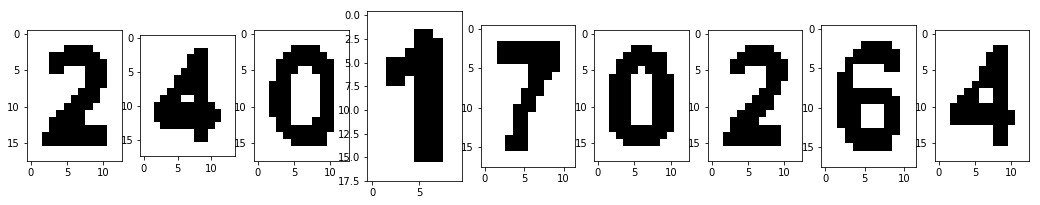

In [92]:
plotDigits(getImageDigits("./test-images/rut_2.png"))

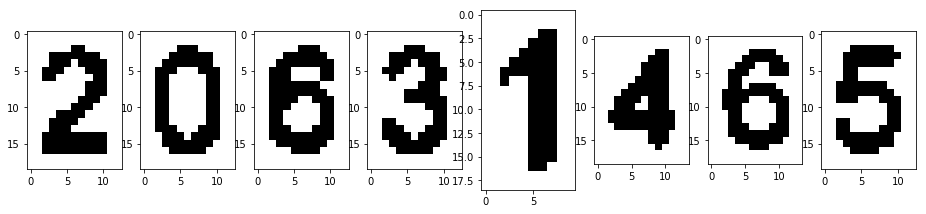

In [93]:
plotDigits(getImageDigits("./test-images/rut_3.png"))

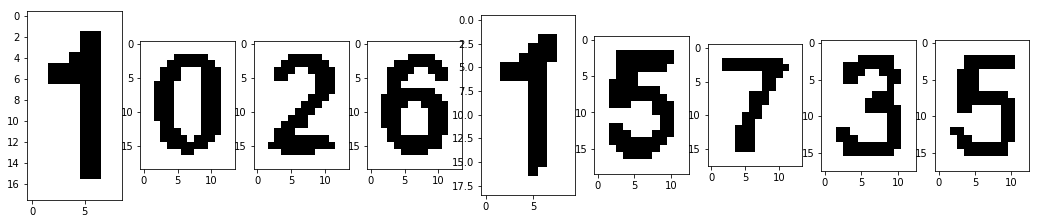

In [94]:
plotDigits(getImageDigits("./test-images/rut_4.png"))

# Inspect Training Set

In [37]:
sampleCeroFilename = "./digits/0/dig_0_100.png"
sampleCero=io.imread(sampleCeroFilename)

In [144]:
sampleCero

array([[255, 255, 255,   0, 255, 255, 255, 255, 255, 255,   0, 255, 255],
       [255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0, 255],
       [255,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0],
       [255,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0],
       [255,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 

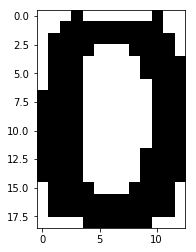

In [38]:
plt.imshow(sampleCero,cmap='gray')
plt.show()

In [157]:
maskX = [[-1, 0, 1]]
maskY = [[-1], [0], [1]]

In [171]:
gradX = signal.convolve(sampleCero, maskX, mode = 'same')
gradY = signal.convolve(sampleCero, maskY, mode = 'same')

## Gradientes: Prewitt, Sobel y Manual

In [172]:
prewittH = filters.prewitt_h(sampleCero)
prewittV = filters.prewitt_v(sampleCero)
sobelH = filters.sobel_h(sampleCero)
sobelV = filters.sobel_v(sampleCero)

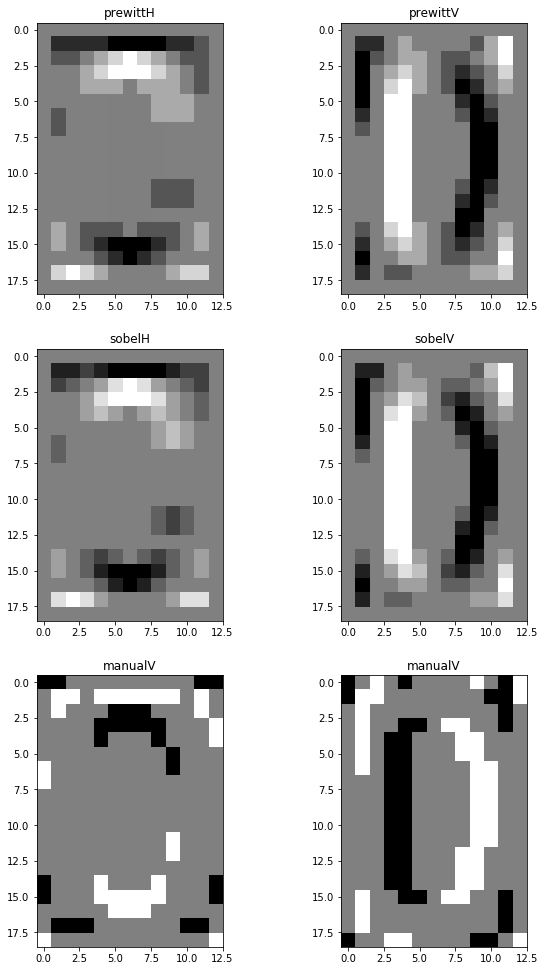

In [173]:
fig = plt.figure(figsize=(10,17))

ax = plt.subplot(3, 2, 1)
ax.set_title("prewittH")
ax.imshow(prewittH, cmap="gray")

ax = plt.subplot(3, 2, 2)
ax.set_title("prewittV")
ax.imshow(prewittV, cmap="gray")

ax = plt.subplot(3,2, 3)
ax.set_title("sobelH")
ax.imshow(sobelH, cmap="gray")

ax = plt.subplot(3, 2, 4)
ax.set_title("sobelV")
ax.imshow(sobelV, cmap="gray")

ax = plt.subplot(3, 2, 5)
ax.set_title("manualV")
ax.imshow(gradY, cmap="gray")

ax = plt.subplot(3, 2, 6)
ax.set_title("manualV")
ax.imshow(gradX, cmap="gray")

plt.show()

## Magnitudes y Orientaciones

In [176]:
orientPrewitt = np.arctan2(prewittV, prewittH)
orientSobel = np.arctan2(sobelV, sobelH)
orientManual = np.arctan2(gradY, gradX)

magPrewitt = np.sqrt(prewittV**2 + prewittH**2)
magSobel = np.sqrt(sobelV**2 + sobelH**2)
magManual = np.sqrt(gradY**2 + gradX**2)

In [130]:
orientPrewitt

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        , -2.35619449, -2.35619449,  3.14159265,  2.67794504,
         3.14159265,  3.14159265,  3.14159265,  3.14159265, -2.67794504,
         2.67794504,  1.89254688,  0.        ],
       [ 0.        , -1.89254688, -2.35619449,  0.        ,  0.78539816,
         0.46364761,  0.        , -0.46364761, -0.78539816,  0.        ,
         2.35619449,  1.89254688,  0.        ],
       [ 0.        , -1.57079633,  0.        ,  0.78539816,  0.78539816,
         0.32175055,  0.        , -0.32175055, -0.78539816, -0.78539816,
         0.        ,  2.03444394,  0.        ],
       [ 0.        , -1.57079633,  0.        ,  1.10714872,  1.24904577,
         0.78539816,  3.14159265, -0.78539816, -1.24904577, -1.10714872,
         0.        ,  2.35619449,  0.        ],
       [ 0.        , -1.570796

## Histograma de Orientaciones

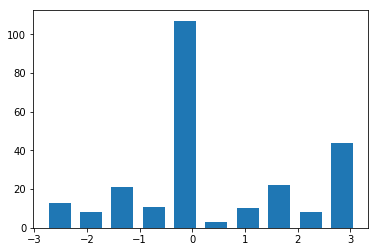

In [106]:
hist, bins = np.histogram(orientPrewitt, bins=10)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

## Refactor para cálculo de histograma

In [111]:
def getImageOrientations(testImageFilename):
    sampleImage=io.imread(testImageFilename)
    prewittH = filters.prewitt_h(sampleImage)
    prewittV = filters.prewitt_v(sampleImage)
    orientPrewitt = np.arctan2(prewittV, prewittH)
    return orientPrewitt

In [112]:
def getOrientationHistogram(imageOrientations, binCount):
    return np.histogram(imageOrientations, bins=binCount)

In [113]:
def plotOrientationsHistogram(imageOrientations, binCount):
    hist, bins = getOrientationHistogram(imageOrientations, binCount)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.show()

## Test on different numbers

In [122]:
sampleDigitFilenameList =["./digits/0/dig_1500070685.png",
                    "./digits/1/dig_1500063963.png",
                    "./digits/2/dig_1500063977.png",
                    "./digits/3/dig_1500063964.png",
                    "./digits/4/dig_1500063982.png",
                    "./digits/5/dig_1500064000.png",
                    "./digits/6/dig_1500063975.png",
                    "./digits/7/dig_1500064329.png",
                    "./digits/8/dig_1500064008.png",
                    "./digits/9/dig_1500063965.png",
                    "./digits/K/dig_1500066216.png"
                   ]

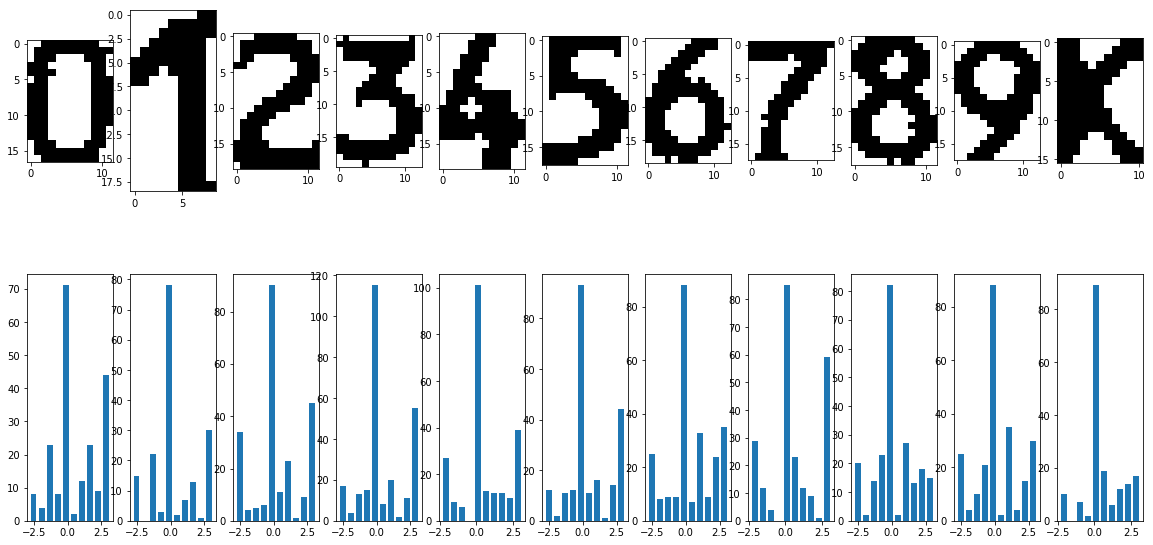

In [129]:
plt.figure(figsize=(20,10))
columns = len(sampleDigitFilenameList)
i=1
for sampleDigitFilename in sampleDigitFilenameList:
    sampleDigit=io.imread(sampleDigitFilename)
    plt.subplot(2, columns, i)
    plt.imshow(sampleDigit, cmap="gray")
    plt.subplot(2, columns, columns+i)
    hist, bins = getOrientationHistogram(getImageOrientations(sampleDigitFilename), 10)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    i = i+1

In [ ]:

i = 0
for digit in digits:
    plt.subplot(len(digits) / columns + 1, columns, i+1)
    plt.imshow(digit, cmap="gray")
    i = i + 1

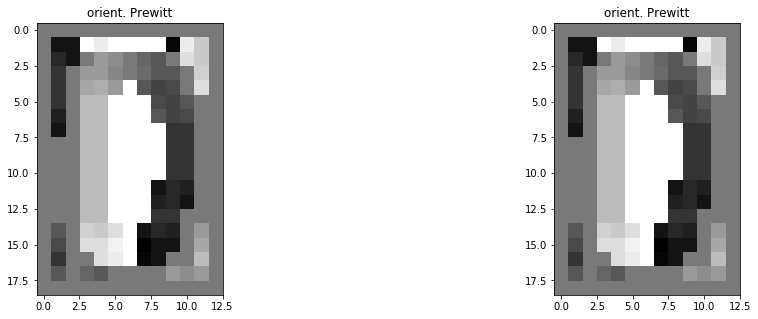

In [64]:
fig = plt.figure(figsize=(17,5))

ax = plt.subplot(1, 2, 1)
ax.set_title("orient. Prewitt")
plt.imshow(orientPrewitt, cmap="gray")

ax = plt.subplot(1, 2, 2)
ax.set_title("orient. Prewitt")
plt.imshow(orientPrewitt, cmap="gray")

plt.show()

In [132]:
from skimage.feature import hog